## Loading and Visualizing Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import optimize
from scipy.io import loadmat

In [9]:
data = loadmat('ex5data1.mat')

X, y = data['X'], data['y'].ravel()
Xtest, ytest = data['Xtest'], data['ytest'].ravel()
Xval, yval = data['Xval'], data['yval'].ravel()

print(f'Training samples : {X.shape}')
print(f'Training labels : {y.shape}')
print(f'Training samples: \n {X}\n')
print(f'Training labels')

print(f'Test samples : {X.shape}')
print(f'Test labels : {y.shape}')

print(f'Validation samples : {X.shape}')
print(f'Validation labels : {y.shape}')




Training samples : (12, 1)
Training labels : (12,)
Training samples: 
 [[-15.93675813]
 [-29.15297922]
 [ 36.18954863]
 [ 37.49218733]
 [-48.05882945]
 [ -8.94145794]
 [ 15.30779289]
 [-34.70626581]
 [  1.38915437]
 [-44.38375985]
 [  7.01350208]
 [ 22.76274892]]

Training labels
Test samples : (12, 1)
Test labels : (12,)
Validation samples : (12, 1)
Validation labels : (12,)


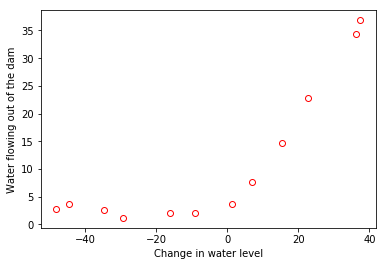

In [18]:
plt.scatter(X.flatten(), y, c='white', edgecolors='red')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.show()

## Regularized Linear Regression Cost and Gradient

In [44]:
def linearRegCostFunction(X, y, theta, lmbda):
    '''Compute cost and gradient for regularized linear regression with multiple variables'''
    
    m = y.size
    
    X = np.concatenate([np.ones((m,1)), X], axis=1)
    y = y.reshape(len(y), 1)
    
    grad = np.zeros(theta.shape)
    J = 1/(2 *m) * np.sum((X.dot(theta) - y) ** 2) + lmbda/(2* m) * np.sum(theta[1:] ** 2)
    grad[0] = (1/m) * np.sum(X.dot(theta) - y)
    grad[1:] = (1/m) * np.sum((X.dot(theta) - y) * X[:, 1:]) + lmbda/m * theta[1:]
    
    return J, grad

In [45]:
theta = np.ones((2,1))

(J, grad) = linearRegCostFunction(X, y, theta, 1);

print(f'Cost at theta = [1 ; 1]: {J}\n(this value should be about 303.993192)\n');

print(f'Gradient at theta = [1 ; 1]:  {grad[0], grad[1]} \n(this value should be about [-15.303016; 598.250744])\n')

(12,)
[[-17.07106864 -16.11001481 -49.29586731 -51.7747133  -17.74572321
  -17.05783061 -29.64702644 -17.55094252 -18.6769298  -18.66844944
  -22.56441699 -37.68918644]
 [-30.28728972 -29.3262359  -62.5120884  -64.99093438 -30.96194429
  -30.27405169 -42.86324752 -30.7671636  -31.89315088 -31.88467053
  -35.78063807 -50.90540752]
 [ 35.05523812  36.01629195   2.83043945   0.35159346  34.38058355
   35.06847615  22.47928032  34.57536424  33.44937696  33.45785732
   29.56188977  14.43712032]
 [ 36.35787683  37.31893065   4.13307815   1.65423217  35.68322226
   36.37111486  23.78191903  35.87800295  34.75201567  34.76049602
   30.86452848  15.73975903]
 [-49.19313996 -48.23208613 -81.41793863 -83.89678462 -49.86779453
  -49.17990193 -61.76909776 -49.67301384 -50.79900112 -50.79052076
  -54.6864883  -69.81125775]
 [-10.07576844  -9.11471462 -42.30056712 -44.7794131  -10.75042301
  -10.06253041 -22.65172624 -10.55564232 -11.6816296  -11.67314925
  -15.56911679 -30.69388624]
 [ 14.17348238  